# OlacomTech Ng. 

### ProjectLab - Housing_Price_Prediction
Data Scientist - Joseph Olanrewaju | JolanAnalytics

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px 
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import make_pipeline
from ipywidgets import  IntSlider, interact

In [3]:
#Read file into DataFrame and view. 

df = pd.read_csv("Desktop/OlacomTech Ng/Data Science Department/Housing Price Prediction Data/housing_price_dataset.csv")
print("df shape:", df.shape)
print(df.head(10))

df shape: (50000, 6)
   SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price
0        2126         4          1        Rural       1969  215355.283618
1        2459         3          2        Rural       1980  195014.221626
2        1860         2          1       Suburb       1970  306891.012076
3        2294         2          1        Urban       1996  206786.787153
4        2130         5          2       Suburb       2001  272436.239065
5        2095         2          3       Suburb       2020  198208.803907
6        2724         2          1       Suburb       1993  343429.319110
7        2044         4          3        Rural       1957  184992.321268
8        2638         4          3        Urban       1959  377998.588152
9        1121         5          2        Urban       2004   95961.926014


In [4]:
#Explore the df info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [5]:
# Check price decimal places 
df["Price"].head()

0    215355.283618
1    195014.221626
2    306891.012076
3    206786.787153
4    272436.239065
Name: Price, dtype: float64

In [6]:
#Round the "Price" to 2dp for easy reading 
df["Price"].round(2).head()

0    215355.28
1    195014.22
2    306891.01
3    206786.79
4    272436.24
Name: Price, dtype: float64

# Data Wrangling 

In [8]:
#Checking for miss values 
df.isnull().sum() / len(df)

SquareFeet      0.0
Bedrooms        0.0
Bathrooms       0.0
Neighborhood    0.0
YearBuilt       0.0
Price           0.0
dtype: float64

In [9]:
# Data Wrangling (Iterating)
df["Price"] = df["Price"].round(2)
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.28
1,2459,3,2,Rural,1980,195014.22
2,1860,2,1,Suburb,1970,306891.01
3,2294,2,1,Urban,1996,206786.79
4,2130,5,2,Suburb,2001,272436.24


In [10]:
#Dropping "Low & High" Cardinality 
print(df["Neighborhood"].unique())
print(df['Neighborhood'].head())
df.drop(columns = ["Neighborhood", "Bedrooms", "Bathrooms"], inplace=True)
df.head()

['Rural' 'Suburb' 'Urban']
0     Rural
1     Rural
2    Suburb
3     Urban
4    Suburb
Name: Neighborhood, dtype: object


,SquareFeet,YearBuilt,Price
0,2126,1969,215355.28
1,2459,1980,195014.22
2,1860,1970,306891.01
3,2294,1996,206786.79
4,2130,2001,272436.24


# Explore 

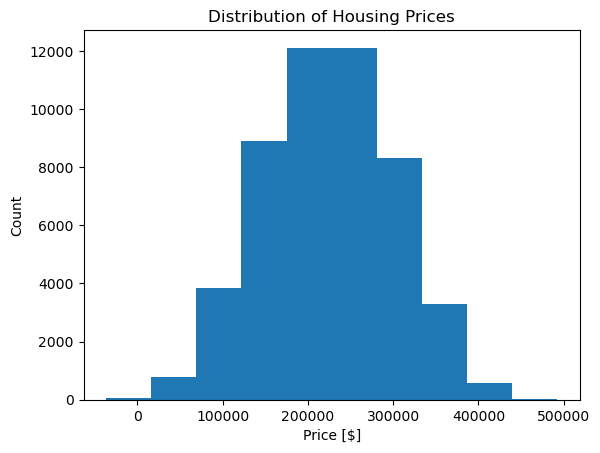

In [12]:
# Build histogram
plt.hist(df["Price"]);
# Label axes
plt.xlabel("Price [$]");
plt.ylabel("Count");
# Add title
plt.title("Distribution of Housing Prices");


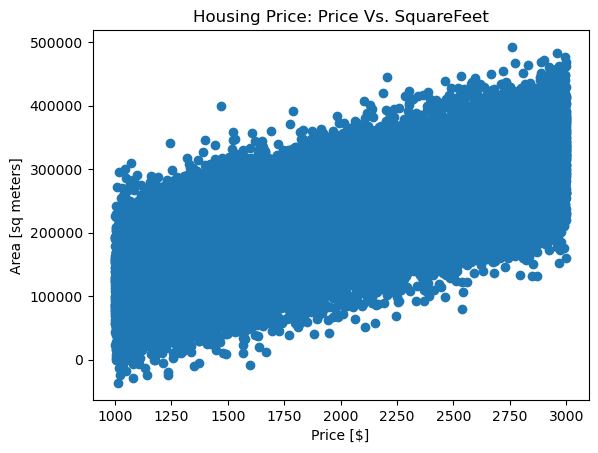

In [13]:
# Plot scatter SquareFeet and Price
plt.scatter(x=df['SquareFeet'], y=df['Price'])
plt.xlabel("Price [$]")
plt.ylabel("Area [sq meters]")
plt.title("Housing Price: Price Vs. SquareFeet"); 

# Split 

In [15]:

feature = ["SquareFeet", "YearBuilt"]
X_train = df[feature]
target = "Price"
y_train = df[target]

## Model Building 

### Baseline

In [18]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)
baseline_mae = mean_absolute_error(y_train, y_pred_baseline)
print("Mean apt price:", y_mean.round(2))
print("Baseline MAE:", round(baseline_mae, 2))

Mean apt price: 224827.33
Baseline MAE: 62179.68


### Iterate 

In [20]:
model = make_pipeline(
    OneHotEncoder (),
    Ridge()
)
model.fit(X_train, y_train)


Pipeline(steps=[('onehotencoder', OneHotEncoder()), ('ridge', Ridge())])

### Evaluate 

In [22]:
y_pred_training = model.predict(X_train)
print("Training MAE:", mean_absolute_error(y_train, y_pred_training).round(2))

Training MAE: 39373.06


# Communicate Result

In [24]:
# Function for any programmer 

def make_prediction(SquareFeet, YearBuilt):
    data = {
    "SquareFeet": SquareFeet,
    "YearBuilt" : YearBuilt,
    }
    df=pd.DataFrame(data, index=[0])
    prediction = model.predict (df).round(2)[0]
    return f"Predicted House Price: ${prediction}"

In [25]:
make_prediction(2459, 2010)

'Predicted House Price: $271775.54'

In [26]:
# An interactive Dashboard for a user 
interact(
    make_prediction,
    SquareFeet=IntSlider(
        min=X_train["SquareFeet"].min(),
        max=X_train["SquareFeet"].max(),
        value=X_train["SquareFeet"].mean(),
    ),
    YearBuilt=IntSlider(
        min=X_train["YearBuilt"].min(),
        max=X_train["YearBuilt"].max(),
        value=X_train["YearBuilt"].mean()
    )
);

interactive(children=(IntSlider(value=2006, description='SquareFeet', max=2999, min=1000), IntSlider(value=198…